In [136]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras import regularizers


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics
from keras.models import model_from_json

# Data Preparation

In [21]:
data = pd.read_csv('creditcard.csv')

In [22]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
data.shape

(284807, 31)

In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

In [27]:
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Time','Amount'], axis=1, inplace=True)

In [28]:
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']

data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [29]:
data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data.loc[data['Class'] == 1]
non_fraud_data = data.loc[data['Class'] == 0]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)

new_data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
142845,-0.294977,0.003266,-0.643289,1.111970,1.030895,-0.221850,0.338434,-0.061197,0.423456,0.297952,...,0.165705,-0.248638,-0.620759,-0.025444,-0.387425,-0.200938,0.112413,0.361636,0.138648,0
269693,-0.167819,0.928524,2.071082,0.009446,-1.874424,0.357954,0.460321,-0.650041,0.076407,-0.110158,...,-0.228746,-0.390955,-1.101972,0.318322,0.133907,-0.283987,0.200072,-0.071010,-0.035862,0
114842,0.041780,-0.129818,1.363328,-0.879909,0.626231,-0.911871,-1.202636,0.029326,-1.229739,0.216405,...,0.058013,0.369472,0.887971,-0.210716,-0.494394,0.451320,-0.011622,0.020387,0.006290,0
203686,-0.064277,0.590139,-0.331148,1.142624,-0.295831,0.887970,2.048883,-0.323412,1.914100,-0.799886,...,0.299190,-0.056044,0.596288,-0.251516,0.591721,-0.046743,-0.533933,-0.324109,-0.335272,0
45551,-0.251520,-0.496869,-0.147158,0.776464,0.934399,-0.286470,-0.514507,-0.390317,-0.796597,-2.736510,...,0.495200,-1.500039,-0.272762,0.023828,0.406898,0.680152,0.371357,0.009900,0.225298,0


In [30]:
# sb.countplot(new_data['Class'])

# Data Splitter

In [31]:
size=len(non_fraud_data)

In [32]:
NF_Global=non_fraud_data[:int(size*0.1)]
NF_Model_1A=non_fraud_data[int(size*0.1):int(size*0.3)]
NF_Model_2A=non_fraud_data[int(size*0.3):int(size*0.45)]
NF_Model_3A=non_fraud_data[int(size*0.45):int(size*0.50)]
NF_Model_1B=non_fraud_data[int(size*0.50):int(size*0.70)]
NF_Model_2B=non_fraud_data[int(size*0.70):int(size*0.85)]
NF_Model_3B=non_fraud_data[int(size*0.85):int(size*0.9)]
NF_Test=non_fraud_data[int(size*0.9):]

In [35]:
size=len(fraud_data)

In [36]:
F_Global=fraud_data[:int(size*0.1)]
F_Model_1A=fraud_data[int(size*0.1):int(size*0.3)]
F_Model_2A=fraud_data[int(size*0.3):int(size*0.45)]
F_Model_3A=fraud_data[int(size*0.45):int(size*0.50)]
F_Model_1B=fraud_data[int(size*0.50):int(size*0.70)]
F_Model_2B=fraud_data[int(size*0.70):int(size*0.85)]
F_Model_3B=fraud_data[int(size*0.85):int(size*0.9)]
F_Test=fraud_data[int(size*0.9):]


In [37]:
Data_Global =pd.concat([NF_Global,F_Global])
Data_Model_1A=pd.concat([NF_Model_1A,F_Model_1A])
Data_Model_2A=pd.concat([NF_Model_2A,F_Model_2A])
Data_Model_3A=pd.concat([NF_Model_3A,F_Model_3A])
Data_Model_1B=pd.concat([NF_Model_1B,F_Model_1B])
Data_Model_2B=pd.concat([NF_Model_2B,F_Model_2B])
Data_Model_3B=pd.concat([NF_Model_3B,F_Model_3B])
Data_Test=pd.concat([NF_Test,F_Test])

In [38]:
list_partitions=[Data_Global,Data_Model_1A,Data_Model_2A,Data_Model_3A,Data_Model_1B,Data_Model_2B,Data_Model_3B,Data_Test]
print("DataSet,   size")
for i in range(len(list_partitions)):
    print(i,"   ",len(list_partitions[i])/len(data)*100)
    

DataSet,   size
0     9.999754219524098
1     19.99985955401377
2     14.999982444251723
3     5.000228224727622
4     19.99985955401377
5     14.999982444251723
6     4.999877109762049
7     10.000456449455244


In [49]:
def DataBalancer(data):
    fraud_data = data.loc[data['Class'] == 1]
    non_fraud_data = data.loc[data['Class'] == 0].sample(len(fraud_data))

    return pd.concat([fraud_data, non_fraud_data])
    

In [106]:
def split(data):
    X=data.copy()
    X.drop(['Class'],axis=1,inplace=True)
    Y=data[['Class']]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    return X_train, Y_train,X_test,Y_test

# Model Store/Load

In [134]:
def saveModel(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")

In [135]:
def loadModel():
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    return loaded_model

# Model Architecture

In [253]:
result_array=[]

In [254]:
input_shape=(30,)
def Model():

    model = Sequential()
    model.add(Dense(32, activation='relu',input_shape=input_shape,kernel_regularizer=regularizers.l2(0.01))) 
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',   #rmsprop
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
        
    return model

In [255]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Global))
model=Model()
model.fit(X_train, Y_train, epochs=5,validation_split=0.1, verbose=1)

Train on 79 samples, validate on 9 samples
Epoch 1/5
79/79 [==============================] - 2s 30ms/step - loss: 0.8410 - acc: 0.7595 - val_loss: 0.9237 - val_acc: 0.7778
Epoch 2/5
79/79 [==============================] - 0s 224us/step - loss: 0.7918 - acc: 0.7848 - val_loss: 0.9075 - val_acc: 0.7778
Epoch 3/5
79/79 [==============================] - 0s 102us/step - loss: 0.7515 - acc: 0.7595 - val_loss: 0.8923 - val_acc: 0.7778
Epoch 4/5
79/79 [==============================] - 0s 101us/step - loss: 0.7776 - acc: 0.7468 - val_loss: 0.8788 - val_acc: 0.7778
Epoch 5/5
79/79 [==============================] - 0s 101us/step - loss: 0.7186 - acc: 0.7848 - val_loss: 0.8667 - val_acc: 0.7778


In [256]:
print("accuracy for Global Model")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Global Model
10/10 [==============================] - 0s 397us/step


69.9999988079071

In [257]:
saveModel(model)

Saved model to disk


In [258]:
w0=np.array(loadModel().get_weights())

Loaded model from disk


In [259]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_1A))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=5,validation_split=0.2, verbose=1)

Loaded model from disk
Train on 140 samples, validate on 36 samples
Epoch 1/5
140/140 [==============================] - 2s 17ms/step - loss: 0.7331 - acc: 0.7214 - val_loss: 0.7544 - val_acc: 0.6667
Epoch 2/5
140/140 [==============================] - 0s 154us/step - loss: 0.6754 - acc: 0.7929 - val_loss: 0.7347 - val_acc: 0.7222
Epoch 3/5
140/140 [==============================] - 0s 119us/step - loss: 0.6522 - acc: 0.8500 - val_loss: 0.7159 - val_acc: 0.7500
Epoch 4/5
140/140 [==============================] - 0s 143us/step - loss: 0.6318 - acc: 0.8786 - val_loss: 0.7002 - val_acc: 0.7778
Epoch 5/5
140/140 [==============================] - 0s 143us/step - loss: 0.6040 - acc: 0.8643 - val_loss: 0.6861 - val_acc: 0.7778


In [260]:
delta_1A=w0-loaded_model.get_weights()

In [261]:
print("accuracy for Model 1A")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 1A
20/20 [==============================] - 0s 0us/step


64.99999761581421

In [262]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_2A))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=5,validation_split=0.2, verbose=1)

Loaded model from disk
Train on 106 samples, validate on 27 samples
Epoch 1/5
106/106 [==============================] - 2s 22ms/step - loss: 0.7508 - acc: 0.7736 - val_loss: 0.7480 - val_acc: 0.7778
Epoch 2/5
106/106 [==============================] - 0s 102us/step - loss: 0.6772 - acc: 0.8019 - val_loss: 0.7225 - val_acc: 0.8148
Epoch 3/5
106/106 [==============================] - 0s 76us/step - loss: 0.6879 - acc: 0.8113 - val_loss: 0.7002 - val_acc: 0.8148
Epoch 4/5
106/106 [==============================] - 0s 118us/step - loss: 0.6650 - acc: 0.8113 - val_loss: 0.6801 - val_acc: 0.8148
Epoch 5/5
106/106 [==============================] - 0s 75us/step - loss: 0.6540 - acc: 0.8491 - val_loss: 0.6653 - val_acc: 0.8148


In [263]:
delta_2A=w0-loaded_model.get_weights()


In [264]:
print("accuracy for Model 2A")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 2A
15/15 [==============================] - 0s 0us/step


73.33333492279053

In [265]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_3A))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=5,validation_split=0.2, verbose=1)

Loaded model from disk
Train on 36 samples, validate on 9 samples
Epoch 1/5
36/36 [==============================] - 2s 65ms/step - loss: 0.8266 - acc: 0.7500 - val_loss: 0.6656 - val_acc: 0.7778
Epoch 2/5
36/36 [==============================] - 0s 500us/step - loss: 0.7883 - acc: 0.6667 - val_loss: 0.6490 - val_acc: 0.7778
Epoch 3/5
36/36 [==============================] - 0s 224us/step - loss: 0.7787 - acc: 0.7222 - val_loss: 0.6374 - val_acc: 0.7778
Epoch 4/5
36/36 [==============================] - 0s 221us/step - loss: 0.8331 - acc: 0.7500 - val_loss: 0.6276 - val_acc: 0.7778
Epoch 5/5
36/36 [==============================] - 0s 139us/step - loss: 0.7646 - acc: 0.7500 - val_loss: 0.6180 - val_acc: 0.7778


In [266]:
delta_3A=w0-loaded_model.get_weights()

In [267]:
print("accuracy for Model 3A")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 3A
5/5 [==============================] - 0s 0us/step


20.000000298023224

In [268]:
delta=(delta_1A+delta_2A+delta_3A)/3

In [269]:
w1=w0+delta

In [270]:
loaded_model=loadModel()
loaded_model.set_weights(w1)
saveModel(loaded_model)

Loaded model from disk
Saved model to disk


In [271]:
w1=np.array(loadModel().get_weights())

Loaded model from disk


In [272]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_1B))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=5,validation_split=0.1, verbose=1)

Loaded model from disk
Train on 158 samples, validate on 18 samples
Epoch 1/5
158/158 [==============================] - 3s 16ms/step - loss: 0.8691 - acc: 0.6709 - val_loss: 0.8370 - val_acc: 0.7222
Epoch 2/5
158/158 [==============================] - 0s 175us/step - loss: 0.8134 - acc: 0.6772 - val_loss: 0.8134 - val_acc: 0.7222
Epoch 3/5
158/158 [==============================] - 0s 78us/step - loss: 0.7760 - acc: 0.6582 - val_loss: 0.7887 - val_acc: 0.7778
Epoch 4/5
158/158 [==============================] - 0s 76us/step - loss: 0.7344 - acc: 0.7532 - val_loss: 0.7662 - val_acc: 0.7778
Epoch 5/5
158/158 [==============================] - 0s 76us/step - loss: 0.7052 - acc: 0.7975 - val_loss: 0.7448 - val_acc: 0.7778


In [273]:
delta_1B=w1-loaded_model.get_weights()

In [274]:
print("accuracy for Model 1B")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 1B
20/20 [==============================] - 0s 52us/step


60.00000238418579

In [275]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_2B))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=5,validation_split=0.1, verbose=1)

Loaded model from disk
Train on 119 samples, validate on 14 samples
Epoch 1/5
119/119 [==============================] - 3s 22ms/step - loss: 0.8882 - acc: 0.6218 - val_loss: 1.0923 - val_acc: 0.2857
Epoch 2/5
119/119 [==============================] - 0s 140us/step - loss: 0.8957 - acc: 0.6639 - val_loss: 1.0547 - val_acc: 0.4286
Epoch 3/5
119/119 [==============================] - 0s 101us/step - loss: 0.8360 - acc: 0.6639 - val_loss: 1.0206 - val_acc: 0.4286
Epoch 4/5
119/119 [==============================] - 0s 101us/step - loss: 0.7564 - acc: 0.7479 - val_loss: 0.9902 - val_acc: 0.4286
Epoch 5/5
119/119 [==============================] - 0s 101us/step - loss: 0.7461 - acc: 0.7731 - val_loss: 0.9613 - val_acc: 0.5000


In [276]:
delta_2B=w1-loaded_model.get_weights()

In [277]:
print("accuracy for Model 2B")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 2B
15/15 [==============================] - 0s 0us/step


73.33333492279053

In [278]:
X_train, Y_train,X_test,Y_test=split(DataBalancer(Data_Model_3B))
loaded_model=loadModel()
loaded_model.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])
loaded_model.fit(X_train, Y_train, epochs=5,validation_split=0.1, verbose=1)

Loaded model from disk
Train on 38 samples, validate on 5 samples
Epoch 1/5
38/38 [==============================] - 3s 69ms/step - loss: 0.9097 - acc: 0.6579 - val_loss: 0.9938 - val_acc: 0.2000
Epoch 2/5
38/38 [==============================] - 0s 270us/step - loss: 0.8440 - acc: 0.7105 - val_loss: 0.9817 - val_acc: 0.2000
Epoch 3/5
38/38 [==============================] - 0s 211us/step - loss: 0.7452 - acc: 0.6842 - val_loss: 0.9749 - val_acc: 0.2000
Epoch 4/5
38/38 [==============================] - 0s 211us/step - loss: 0.7133 - acc: 0.7105 - val_loss: 0.9679 - val_acc: 0.2000
Epoch 5/5
38/38 [==============================] - 0s 200us/step - loss: 0.7095 - acc: 0.7368 - val_loss: 0.9605 - val_acc: 0.2000


In [279]:
delta_3B=w1-loaded_model.get_weights()

In [280]:
print("accuracy for model 3B")
loaded_model.evaluate(X_test,Y_test)[1]*100

accuracy for model 3B
5/5 [==============================] - 0s 0us/step


60.00000238418579

In [281]:
print("accuracy for Model 3B")
x=model.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy for Model 3B
5/5 [==============================] - 0s 3ms/step


80.0000011920929

In [282]:
delta=(delta_1A+delta_2A+delta_3B)/3

In [283]:
w2=w1+delta

In [284]:
loaded_model=loadModel()
loaded_model.set_weights(w2)
saveModel(loaded_model)

Loaded model from disk
Saved model to disk


In [285]:
w=loadModel()
w.compile(optimizer='adam',   #rmsprop
      loss='binary_crossentropy',
      metrics=['accuracy'])

Loaded model from disk


In [286]:
X=DataBalancer(Data_Test)
X.drop(['Class'],axis=1,inplace=True)
Y=DataBalancer(Data_Test)[['Class']]

In [287]:
print("accuracy final")
x=w.evaluate(X_test,Y_test)[1]*100
result_array.append(x)
x

accuracy final
5/5 [==============================] - 2s 428ms/step


40.00000059604645

In [288]:
result_array

[69.9999988079071,
 64.99999761581421,
 73.33333492279053,
 20.000000298023224,
 60.00000238418579,
 73.33333492279053,
 80.0000011920929,
 40.00000059604645]

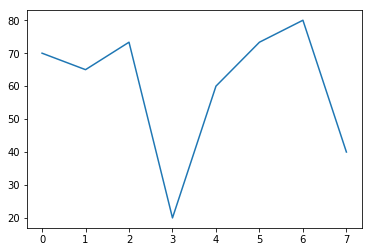

In [289]:
plt.plot(result_array)